# Baseline + Oversampling Pilot Study with additional GPT-generated examples for underrepresented classes

### Baseline : Logistic Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, classification_report
)
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Courier"

In [2]:
# Load data
data = pd.read_csv(#path/to/your/data.csv)

In [3]:
# Define features, labels, and groups
X = data["sentence"]
y = data["label"]
groups = data["filename"]
labels = np.unique(y)

In [4]:
# Bag of Words vectorization
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

In [5]:
# Classifier
clf = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42)

In [6]:
# StratifiedGroupKFold (10 splits)
sgkf = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)
precisions, recalls, f1_scores, accuracies = [], [], [], []
predicted_labels, true_labels = [], []

/opt/anaconda3/envs/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

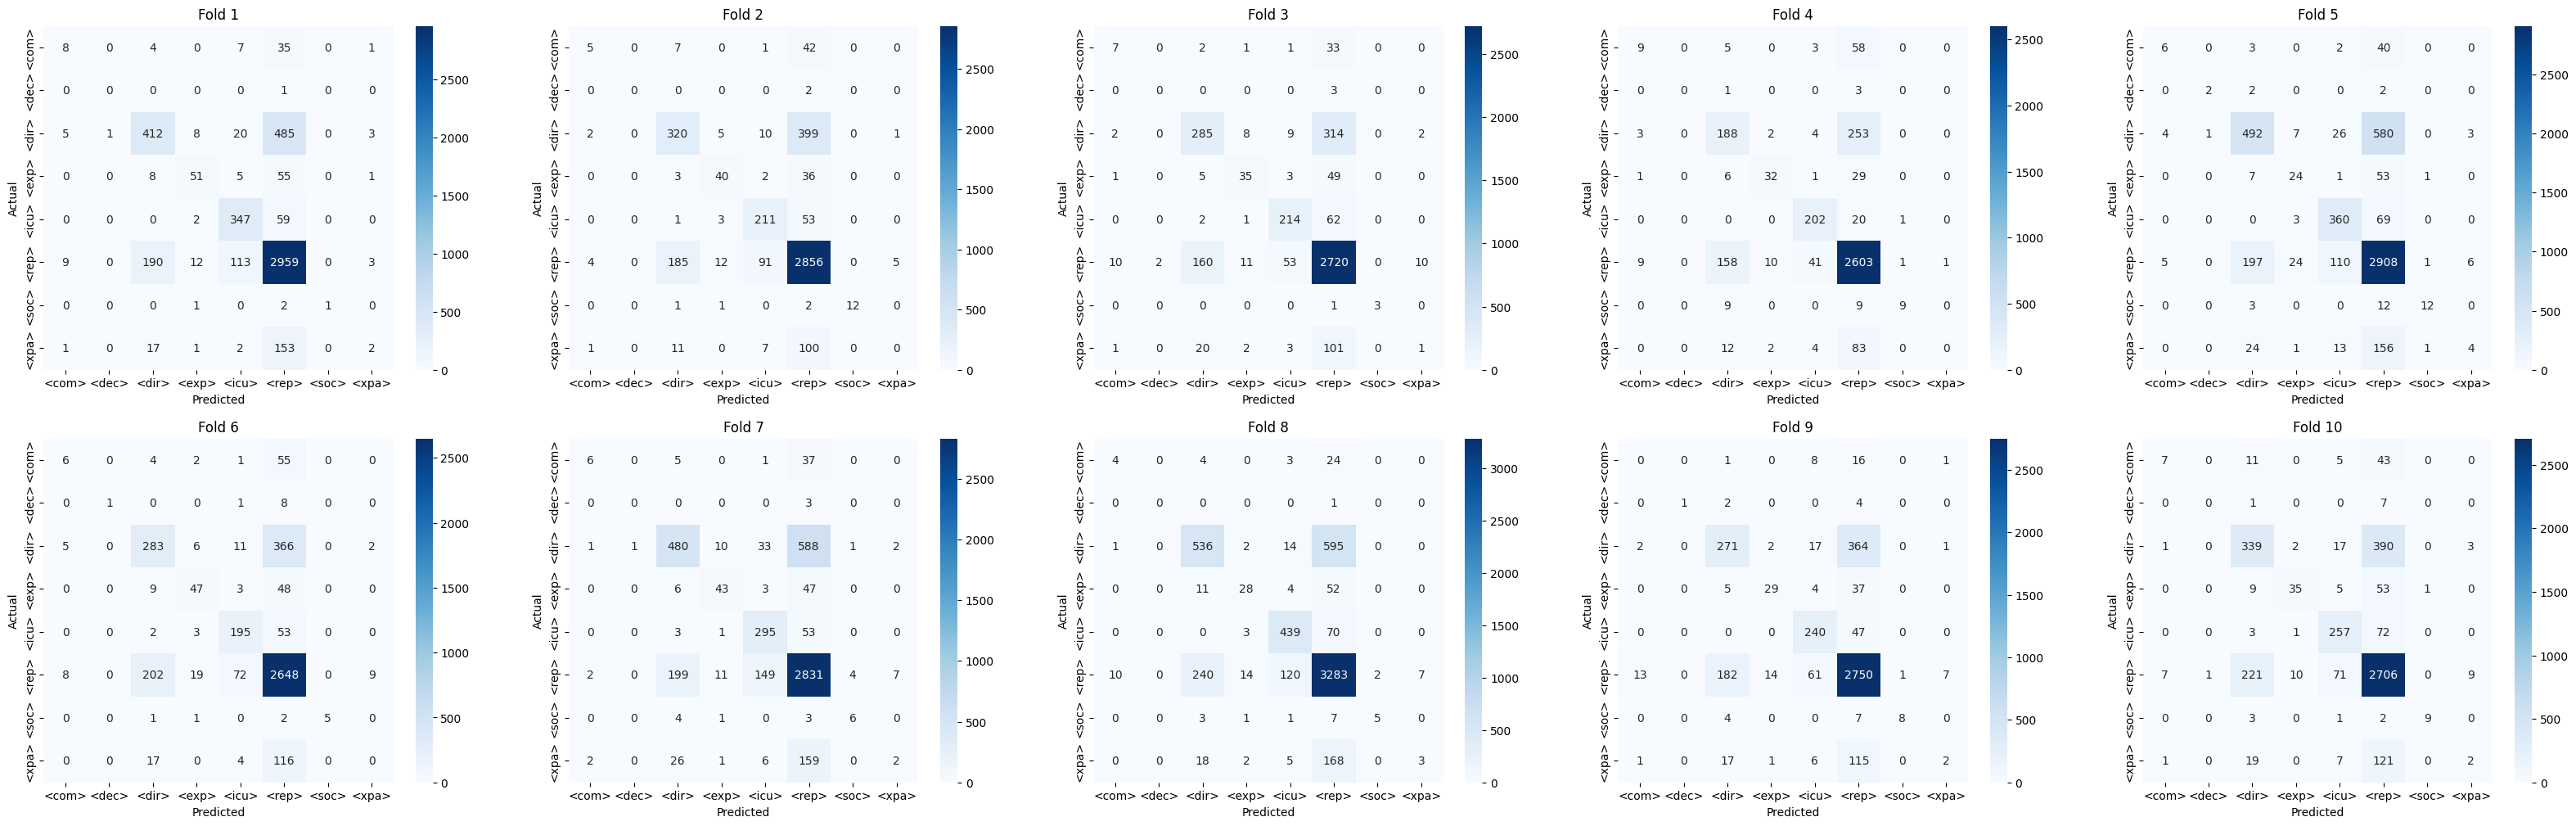

In [7]:
# Prepare subplots
fig, axes = plt.subplots(2, 5, figsize=(40, 12))
axes = axes.flatten()

for fold, (train_idx, test_idx) in enumerate(sgkf.split(X_bow, y, groups=groups)):
    X_train, X_test = X_bow[train_idx], X_bow[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Metrics
    precisions.append(precision_score(y_test, y_pred, average=None, labels=labels))
    recalls.append(recall_score(y_test, y_pred, average=None, labels=labels))
    f1_scores.append(f1_score(y_test, y_pred, average=None, labels=labels))
    accuracies.append(accuracy_score(y_test, y_pred))

    true_labels.extend(y_test)
    predicted_labels.extend(y_pred)

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels, ax=axes[fold])
    axes[fold].set_title(f"Fold {fold + 1}")
    axes[fold].set_xlabel("Predicted")
    axes[fold].set_ylabel("Actual")

In [8]:
# Aggregate metrics
avg_precision = np.mean(precisions, axis=0)
avg_recall = np.mean(recalls, axis=0)
avg_f1_score = np.mean(f1_scores, axis=0)
avg_accuracy = np.mean(accuracies)

print("\nAveraged Precision per Class:")
for i, label in enumerate(labels):
    print(f"  {label}: {avg_precision[i]:.4f}")

print("\nAveraged Recall per Class:")
for i, label in enumerate(labels):
    print(f"  {label}: {avg_recall[i]:.4f}")

print("\nAveraged F1 Score per Class:")
for i, label in enumerate(labels):
    print(f"  {label}: {avg_f1_score[i]:.4f}")

print(f"\nAveraged Accuracy across all folds: {avg_accuracy:.4f}")


Averaged Precision per Class:
  <com>: 0.3472
  <dec>: 0.2667
  <dir>: 0.6024
  <exp>: 0.6206
  <icu>: 0.7066
  <rep>: 0.8015
  <soc>: 0.8667
  <xpa>: 0.1391

Averaged Recall per Class:
  <com>: 0.1064
  <dec>: 0.0576
  <dir>: 0.4376
  <exp>: 0.3933
  <icu>: 0.8218
  <rep>: 0.9015
  <soc>: 0.4827
  <xpa>: 0.0092

Averaged F1 Score per Class:
  <com>: 0.1606
  <dec>: 0.0876
  <dir>: 0.5061
  <exp>: 0.4793
  <icu>: 0.7588
  <rep>: 0.8484
  <soc>: 0.6062
  <xpa>: 0.0172

Averaged Accuracy across all folds: 0.7641


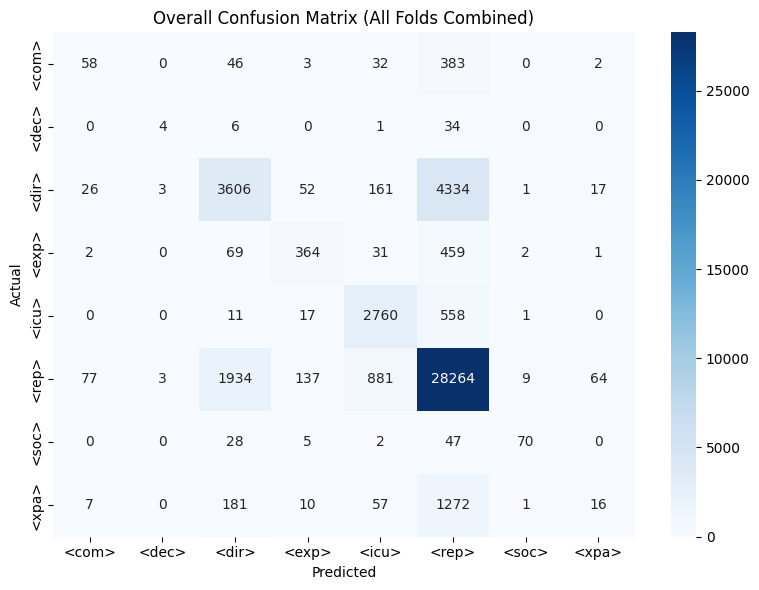


Classification Report (All Folds Combined):
              precision    recall  f1-score   support

       <com>       0.34      0.11      0.17       524
       <dec>       0.40      0.09      0.15        45
       <dir>       0.61      0.44      0.51      8200
       <exp>       0.62      0.39      0.48       928
       <icu>       0.70      0.82      0.76      3347
       <rep>       0.80      0.90      0.85     31369
       <soc>       0.83      0.46      0.59       152
       <xpa>       0.16      0.01      0.02      1544

    accuracy                           0.76     46109
   macro avg       0.56      0.40      0.44     46109
weighted avg       0.73      0.76      0.74     46109



In [9]:
# Overall confusion matrix
final_cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Overall Confusion Matrix (All Folds Combined)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report (All Folds Combined):")
print(classification_report(true_labels, predicted_labels, target_names=labels.astype(str)))

### Baseline + GPT Oversampling

In [10]:
with_generated = pd.read_csv(#path/to/file/with/generated/examples.csv)
X2 = with_generated["Cleaned_Text"]
y2 = with_generated["Label"]
groups2 = with_generated["Filename"]

len(X2), len(y2), len(groups2)

(48265, 48265, 48265)

In [11]:
#assign generated sentences that don't have a filename to one of the existing filenames taking distribution into account
filename_counts = with_generated["Filename"].dropna().value_counts(normalize=True)
print("\nDistribution:\n", filename_counts)

# Step 2: Sample replacements for NaN proportionally
nan_mask = with_generated["Filename"].isna()
n_missing = nan_mask.sum()

with_generated.loc[nan_mask, "Filename"] = np.random.choice(
    filename_counts.index,
    size=n_missing,
    p=filename_counts.values
)

with_generated


Distribution:
 Filename
P1A-072 Driver's licence.txt       0.007106
P1A-050 Fireworks.txt              0.006932
P2A-008 NI v Latvia.txt            0.006802
P1A-087 Line dancing.txt           0.006758
P1A-069 Christmas trees.txt        0.006411
                                     ...   
P2B-037 Clare elections.txt        0.001173
P2A-033 Mental health.txt          0.001152
P1B-067 Resignation query 2.txt    0.001152
P2B-047 QUB graduation.txt         0.001043
P2A-063 Injury decision.txt        0.000934
Name: proportion, Length: 290, dtype: float64


,Unnamed: 0,Register,Dialogue/Monologue,Register_low_level,Region,Filename,Original_Text,Cleaned_Text,Prev_Text,Next_Text,Sentence_Length,Prev_Gold_Label,Source,Label
0,0,Legal presentations,Monologue,Unscripted,S,P2A-070 Banking.txt,ACC Bank is anxious to assist the Subcommittee...,acc bank is anxious to assist the subcommittee...,NaN,at all times it was the firm policy of the ban...,182,NONE,Corpus,exp
1,0,Legal presentations,Monologue,Unscripted,S,P2A-070 Banking.txt,At all times it was the firm policy of the ban...,at all times it was the firm policy of the ban...,acc bank is anxious to assist the subcommittee...,at no time did the bank encourage condone or a...,103,exp,Corpus,rep
2,0,Legal presentations,Monologue,Unscripted,S,P2A-070 Banking.txt,At no time did the bank encourage condone or a...,at no time did the bank encourage condone or a...,at all times it was the firm policy of the ban...,however as the subcommittee is aware certain d...,94,rep,Corpus,rep
3,0,Legal presentations,Monologue,Unscripted,S,P2A-070 Banking.txt,However as the Subcommittee is aware certain d...,however as the subcommittee is aware certain d...,at no time did the bank encourage condone or a...,the bank does not dispute that in some instanc...,204,rep,Corpus,rep
4,0,Legal presentations,Monologue,Unscripted,S,P2A-070 Banking.txt,The bank does not dispute that in some instanc...,the bank does not dispute that in some instanc...,however as the subcommittee is aware certain d...,"it also acknowledges <,> that with hindsight <...",128,rep,Corpus,rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48260,0,NaN,NaN,NaN,NaN,P1A-061 Modern man.txt,NaN,no i 'm not going to let this affect our long-...,NaN,NaN,57,NaN,GPT,com
48261,0,NaN,NaN,NaN,NaN,P2A-037 Maths lecture 2.txt,NaN,aye i 'll provide a detailed breakdown during ...,NaN,NaN,63,NaN,GPT,com
48262,0,NaN,NaN,NaN,NaN,P1B-063 Injury evidence.txt,NaN,i 'll ensure proper communication across all d...,NaN,NaN,57,NaN,GPT,com
48263,0,NaN,NaN,NaN,NaN,P2B-044 Universities.txt,NaN,"no worries <,> we 'll continue to monitor prog...",NaN,NaN,61,NaN,GPT,com


In [12]:
labels2 = np.unique(y)
labels2

array(['<com>', '<dec>', '<dir>', '<exp>', '<icu>', '<rep>', '<soc>',
       '<xpa>'], dtype=object)

In [13]:
groups2.value_counts()

Filename
P1A-072 Driver's licence.txt       341
P1A-050 Fireworks.txt              332
P2A-008 NI v Latvia.txt            329
P1A-087 Line dancing.txt           328
P1A-069 Christmas trees.txt        314
                                  ... 
P2B-037 Clare elections.txt         58
P2A-033 Mental health.txt           56
P1B-067 Resignation query 2.txt     53
P2B-047 QUB graduation.txt          51
P2A-063 Injury decision.txt         45
Name: count, Length: 290, dtype: int64

In [14]:
#delete nans from X2
X2 = X2.dropna()
#delete corresponding rows from y2 and groups
y2 = y2[X2.index]
groups2 = groups2[X2.index]

len(X2), len(y2), len(groups)

(48262, 48262, 46109)

In [15]:
X_bow2 = vectorizer.fit_transform(X2)
# StratifiedGroupKFold (10 splits)
precisions2, recalls2, f1_scores2, accuracies2 = [], [], [], []
predicted_labels2, true_labels2 = [], []

In [16]:
y2.value_counts()

Label
rep    32741
dir     9131
xpa     1733
exp     1497
com     1254
icu      678
soc      671
dec      557
Name: count, dtype: int64

In [17]:
print(len(y2))
print(len(y2.dropna()))
y2 = y2.dropna()

48262
48262


In [18]:
labels2 = [l.strip("<>") for l in labels]
labels2

['com', 'dec', 'dir', 'exp', 'icu', 'rep', 'soc', 'xpa']

In [19]:
groups2

0                P2A-070 Banking.txt
1                P2A-070 Banking.txt
2                P2A-070 Banking.txt
3                P2A-070 Banking.txt
4                P2A-070 Banking.txt
                    ...             
48260         P1A-061 Modern man.txt
48261    P2A-037 Maths lecture 2.txt
48262    P1B-063 Injury evidence.txt
48263       P2B-044 Universities.txt
48264       P1B-006 Ulster Scots.txt
Name: Filename, Length: 48262, dtype: object

In [20]:
labels2

['com', 'dec', 'dir', 'exp', 'icu', 'rep', 'soc', 'xpa']

In [21]:
np.unique(true_labels)

array(['<com>', '<dec>', '<dir>', '<exp>', '<icu>', '<rep>', '<soc>',
       '<xpa>'], dtype='<U5')

In [22]:
labels2
true_labels = [l.strip("<>") for l in true_labels]

In [23]:
groups2

0                P2A-070 Banking.txt
1                P2A-070 Banking.txt
2                P2A-070 Banking.txt
3                P2A-070 Banking.txt
4                P2A-070 Banking.txt
                    ...             
48260         P1A-061 Modern man.txt
48261    P2A-037 Maths lecture 2.txt
48262    P1B-063 Injury evidence.txt
48263       P2B-044 Universities.txt
48264       P1B-006 Ulster Scots.txt
Name: Filename, Length: 48262, dtype: object

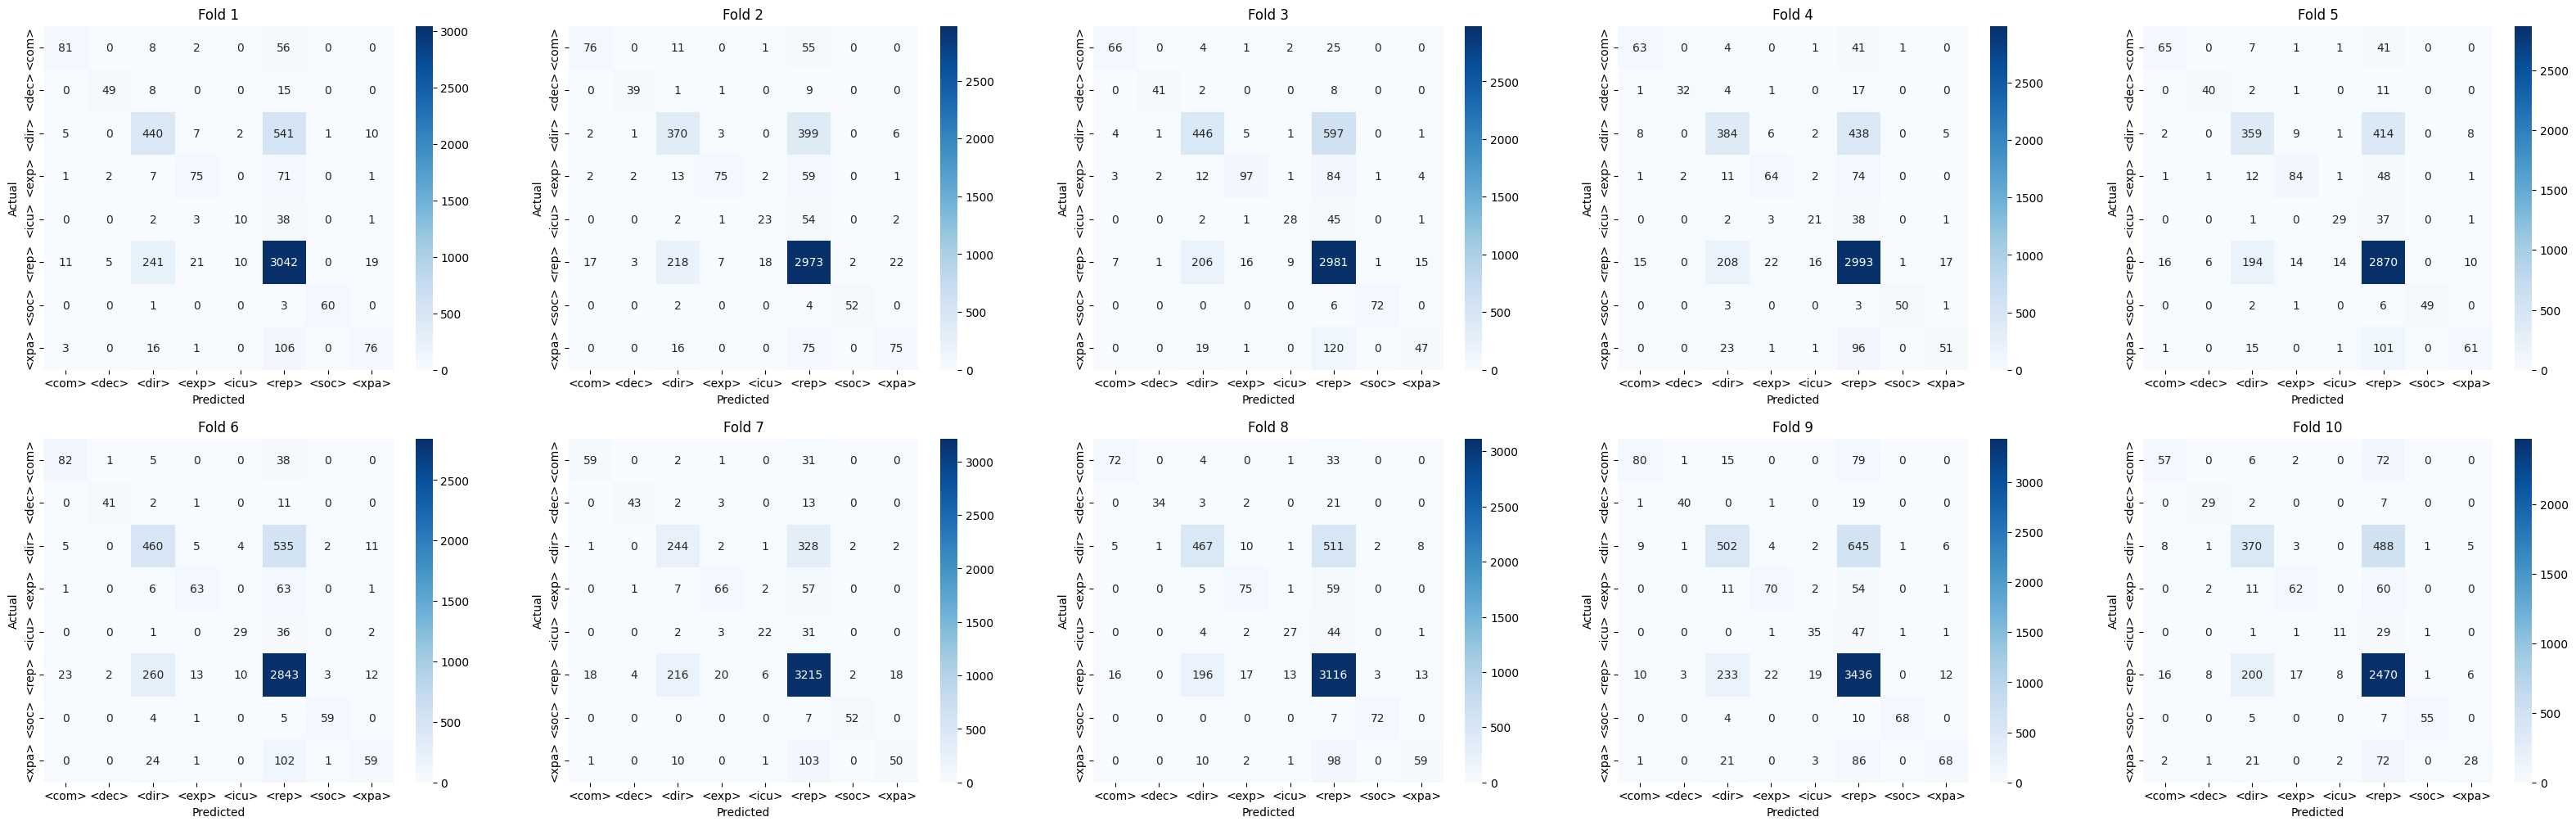

In [24]:
# Prepare subplots
fig, axes = plt.subplots(2, 5, figsize=(40, 12))
axes = axes.flatten()

for fold, (train_idx, test_idx) in enumerate(sgkf.split(X_bow2, y2, groups=groups2)):
    X_train, X_test = X_bow2[train_idx], X_bow2[test_idx]
    y_train, y_test = y2.iloc[train_idx], y2.iloc[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Metrics
    precisions2.append(precision_score(y_test, y_pred, average=None, labels=labels2))
    recalls2.append(recall_score(y_test, y_pred, average=None, labels=labels2))
    f1_scores2.append(f1_score(y_test, y_pred, average=None, labels=labels2))
    accuracies2.append(accuracy_score(y_test, y_pred))

    true_labels.extend(y_test)
    predicted_labels.extend(y_pred)

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred, labels=labels2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels, ax=axes[fold])
    axes[fold].set_title(f"Fold {fold + 1}")
    axes[fold].set_xlabel("Predicted")
    axes[fold].set_ylabel("Actual")

In [25]:
# Aggregate metrics
avg_precision2 = np.mean(precisions2, axis=0)
avg_recall2 = np.mean(recalls2, axis=0)
avg_f1_score2 = np.mean(f1_scores2, axis=0)
avg_accuracy = np.mean(accuracies2)

print("\nAveraged Precision per Class:")
for i, label in enumerate(labels2):
    print(f"  {label}: {avg_precision2[i]:.4f}")

print("\nAveraged Recall per Class:")
for i, label in enumerate(labels2):
    print(f"  {label}: {avg_recall2[i]:.4f}")

print("\nAveraged F1 Score per Class:")
for i, label in enumerate(labels2):
    print(f"  {label}: {avg_f1_score2[i]:.4f}")

print(f"\nAveraged Accuracy across all folds: {avg_accuracy:.4f}")


Averaged Precision per Class:
  com: 0.7630
  dec: 0.8840
  dir: 0.6072
  exp: 0.7358
  icu: 0.5839
  rep: 0.7988
  soc: 0.9572
  xpa: 0.7170

Averaged Recall per Class:
  com: 0.5707
  dec: 0.7023
  dir: 0.4429
  exp: 0.4892
  icu: 0.3398
  rep: 0.9141
  soc: 0.8777
  xpa: 0.3284

Averaged F1 Score per Class:
  com: 0.6500
  dec: 0.7774
  dir: 0.5115
  exp: 0.5863
  icu: 0.4273
  rep: 0.8524
  soc: 0.9152
  xpa: 0.4472

Averaged Accuracy across all folds: 0.7708


In [26]:
predicted_labels = [p.strip("<>") for p in predicted_labels]

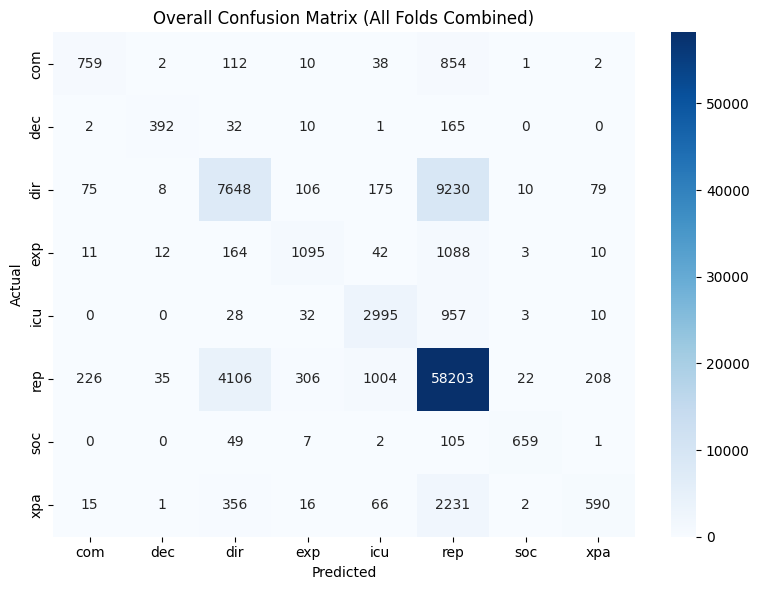


Classification Report (All Folds Combined):
              precision    recall  f1-score   support

       <com>       0.70      0.43      0.53      1778
       <dec>       0.87      0.65      0.75       602
       <dir>       0.61      0.44      0.51     17331
       <exp>       0.69      0.45      0.55      2425
       <icu>       0.69      0.74      0.72      4025
       <rep>       0.80      0.91      0.85     64110
       <soc>       0.94      0.80      0.87       823
       <xpa>       0.66      0.18      0.28      3277

    accuracy                           0.77     94371
   macro avg       0.75      0.58      0.63     94371
weighted avg       0.75      0.77      0.75     94371



In [27]:
# Overall confusion matrix
final_cm = confusion_matrix(true_labels, predicted_labels, labels=labels2)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels2, yticklabels=labels2)
plt.title("Overall Confusion Matrix (All Folds Combined)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report (All Folds Combined):")
print(classification_report(true_labels, predicted_labels, target_names=labels))

In [28]:
labels2

['com', 'dec', 'dir', 'exp', 'icu', 'rep', 'soc', 'xpa']

In [29]:
f1_scores_array = np.array(f1_scores).mean(axis=0)
f1_scores2_array = np.array(f1_scores2).mean(axis=0)


0.43499999999999994
0.6475000000000001


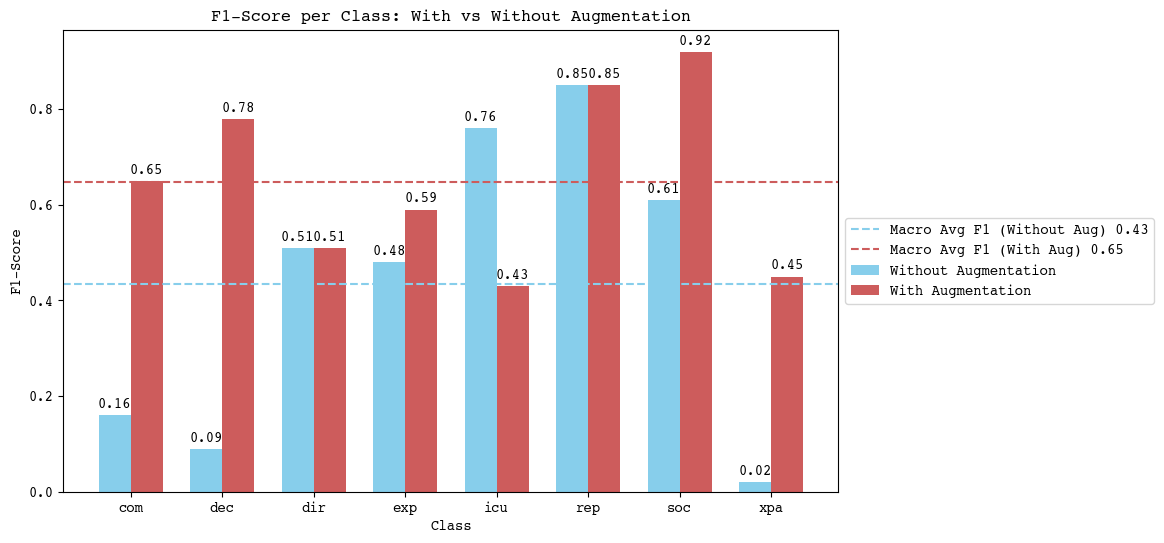

In [30]:
#round f1-scores to 2 decimals so bars with same number have the  same height
f1_scores_array = np.round(f1_scores_array, 2)
f1_scores2_array = np.round(f1_scores2_array, 2)


print(np.mean(f1_scores_array))
print(np.mean(f1_scores2_array))

avg_without_aug = np.mean(f1_scores_array)
avg_with_aug = np.mean(f1_scores2_array)


# Plotting
x = np.arange(len(labels2))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, f1_scores_array, width, label='Without Augmentation', color='skyblue')
rects2 = ax.bar(x + width/2, f1_scores2_array, width, label='With Augmentation', color='indianred')


# Add some text for labels, title and axes ticks
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
ax.set_title('F1-Score per Class: With vs Without Augmentation')
ax.set_xticks(x)
ax.set_xticklabels(labels2)

ax.axhline(avg_without_aug, color='skyblue', linestyle='--', label=f'Macro Avg F1 (Without Aug) {avg_without_aug:.2f}')
ax.axhline(avg_with_aug, color='indianred', linestyle='--', label=f'Macro Avg F1 (With Aug) {avg_with_aug:.2f}')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



# Optionally add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.show()
